# Pandas

In [5]:
import pandas as pd
import numpy as np

## Creating data

In [6]:
filename = './pandasData.csv'
with open(filename, "w") as f:
    f.write("x;y\n")
    x = np.random.normal(0, 2, 1000)
    y = np.random.normal(100, 10, 1000)
    for i in range(1000):
        line = "%d; %d \n" % (x[i], y[i])
        f.write(line)

## Getting data

In [7]:
data = pd.read_csv(filename, sep=';')
data.head(10)

,x,y
0,1,99
1,1,123
2,0,91
3,0,109
4,1,83
5,0,104
6,0,103
7,1,95
8,-4,100
9,0,108


## Queries and filter

In [8]:
data[data['y'] > 120]
data.query('y > 120')

,x,y
1,1,123
79,0,122
116,0,122
144,0,121
187,-1,124
200,0,127
257,0,123
296,-3,125
520,0,127
596,-1,122


In [9]:
data['y'].sum()

99459

In [10]:
data[:20]

,x,y
0,1,99
1,1,123
2,0,91
3,0,109
4,1,83
5,0,104
6,0,103
7,1,95
8,-4,100
9,0,108


## Pandas plot

In [11]:
data['y'].plot()


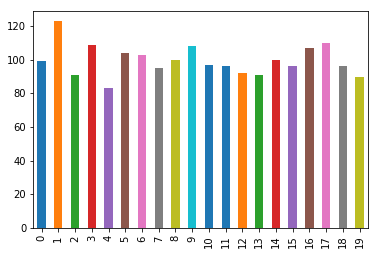

In [12]:
data[:20]['y'].plot(kind='bar')

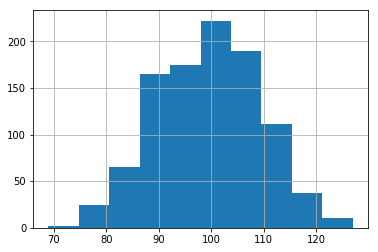

In [13]:
data['y'].hist()

# Data Manipulation with Pandas

In [14]:
# Default configuration for using auto completion with tab key
%config IPCompleter.greedy=True

In [15]:
import pandas
pandas.__version__

'0.22.0'

In [16]:
import pandas as pd 
# provides an efficient implementation of a DataFrame. DataFrames 
# multidimensional arrays with attached row and column labels

In [17]:
pd?

In [18]:
pd.*?

## The Pandas Series Object

In [19]:
import numpy as np

data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [20]:
data.values # NumPy array

array([0.25, 0.5 , 0.75, 1.  ])

In [21]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [22]:
data[1] # like with NumPy

0.5

In [23]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### Series as generalized NumPy array

In [24]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [25]:
data['b']

0.5

In [26]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7]) # non sequential indices
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

### Series as specialized dictionary

In [27]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [28]:
population['California']

38332521

In [29]:
population['California':'Illinois'] # like indices

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series objects

In [30]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [31]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [32]:
pd.Series({2:'a', 1:'b', 3:'c'})


1    b
2    a
3    c
dtype: object

In [33]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

## The Pandas DataFrame Object

### DataFrame as a generalized NumPy array

If a *Series* is an analog of a one-dimensional array with flexible indices, a *DataFrame* is an analog of a two-dimensional array with both flexible row indices and flexible column names.

A *DataFrame* can be represented as a sequence of aligned *Series* objects

In [34]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area # new Series listing the area of each of the five states

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [35]:
states = pd.DataFrame({'population': population,
                       'area': area})
states # data frame which contains area and population of each state

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [36]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [37]:
states.columns

Index(['area', 'population'], dtype='object')

### DataFrame as specialized dictionary

In [38]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

### Constructing DataFrame objects
#### From a single Series object

In [39]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


#### From a list of dicts

In [40]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [41]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a dictionary of Series objects

In [42]:
pd.DataFrame({'population': population,
              'area': area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


#### From a two-dimensional NumPy array

In [43]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.795620,0.815341
b,0.055344,0.175796
c,0.190863,0.916420


#### From a NumPy structured array

In [44]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [45]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## The Pandas Index Object

In [46]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

In [47]:
ind[1] # Index as immutable array


3

In [48]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [49]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [50]:
ind[1] = 0

TypeError: Index does not support mutable operations

### Index as ordered set

In [51]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [52]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [53]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [54]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

## Data Indexing and Selection

### Data Selection in Series

#### Series as dictionary

In [55]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [56]:
data['b']

0.5

In [57]:
'a' in data # examine keys/indices and values

True

In [58]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [59]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [60]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### Series as one-dimensional array

In [61]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [62]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [63]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [64]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

#### Indexers: loc, iloc, and ix

In [117]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [118]:
# explicit index when indexing
data[1]

'a'

In [119]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [120]:
data.loc[1]

'a'

In [121]:
# loc attribute allows indexing and slicing that always references the explicit index
data.loc[1:3]

1    a
3    b
dtype: object

In [122]:
data.iloc[1] # index value

'b'

In [123]:
#  iloc attribute allows indexing and slicing that always references the implicit Python-style index
data.iloc[1:3] # index location

3    b
5    c
dtype: object

In [124]:
data.iloc[0:2]

1    a
3    b
dtype: object

### Data Selection in DataFrame

#### DataFrame as a dictionary

In [125]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [126]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [127]:
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [128]:
data.area is data['area']

True

In [129]:
data.pop is data['pop'] # like Pandas has pop function it does not work


False

In [130]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### DataFrame as two-dimensional array

In [131]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01]])

In [132]:
data.T # swap rows and columns

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


In [133]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [134]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [135]:
# first three row indices and first two cols indices
data.iloc[:3, :2] # using indices 


,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [136]:
data.loc[:'Illinois', :'pop'] # using indices values

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [137]:
data.ix[:3, :'pop'] # hybrid approach using indices and indices values
# deprecated?

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [138]:
# loc indexer we can combine masking and fancy indexing as in the following
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [139]:
data.iloc[0, 2] = 90 # change value
data

,area,pop,density
California,423967,38332521,90.000000
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### Additional indexing conventions

In [140]:
# slices by row indices
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [141]:
# slices can also refer to rows by number rather than by index
data[1:3]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [142]:
data[data.density > 100] # masking

,area,pop,density
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


## Operating on Data in Pandas

### Ufuncs: Index Preservation

In [1]:
import pandas as pd
import numpy as np

In [3]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [4]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [5]:
np.exp(ser) # appli NumPy UFunc on Pandas Series object

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [7]:
np.sin(df * np.pi / 4) # UFunc on Pandas DataFrame object

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


###  UFuncs: Index Alignment

#### Index alignment in Series

In [8]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [9]:
population / area # Union of indices (NaN ==> Missing data)

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [10]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [11]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [16]:
 # add NumPy fill missing values by value of the indices on specific Serie
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

#### Index alignment in DataFrame

In [20]:
# using list for col names
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,17,3
1,13,17


In [19]:
# using list for col names
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,3,8,2
1,4,2,6
2,4,8,6


In [21]:
A + B # default operator

,A,B,C
0,25.0,6.0,NaN
1,15.0,21.0,NaN
2,NaN,NaN,NaN


In [27]:
# fill with the mean of all values in A (computed by first stacking the rows of A)
fill = A.stack().mean()
A.add(B, fill_value=fill)

# How it is computed ? (Here example with current generator)
# (17 + 3 + 17 + 13) / 4 = 12.5 (mean of A)
# [0, C] = 12.5 + B[0,C] = 12.5 + 2 = 14.5
# [1, C] = 12.5 + B[1,C] = 12.5 + 6 = 18.5
# [2, C] = 12.5 + B[2,C] = 12.5 + 6 = 18.5
# [2, B] = 12.5 + B[2,B] = 12.5 + 4 = 16.5
# [2, A] = 12.5 + B[2,A] = 12.5 + 8 = 20.5

,A,B,C
0,25.0,6.0,14.5
1,15.0,21.0,18.5
2,20.5,16.5,18.5


### Ufuncs: Operations Between DataFrame and Series

In [28]:
A = rng.randint(10, size=(3, 4))
A

array([[9, 8, 9, 4],
       [1, 3, 6, 7],
       [2, 0, 3, 1]])

In [30]:
# difference of a two-dimensional array and one of its rows
# NumPy array example
A - A[0]

array([[ 0,  0,  0,  0],
       [-8, -5, -3,  3],
       [-7, -8, -6, -3]])

In [33]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-8,-5,-3,3
2,-7,-8,-6,-3


In [34]:
df

,Q,R,S,T
0,9,8,9,4
1,1,3,6,7
2,2,0,3,1


In [35]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,1,0,1,-4
1,-2,0,3,4
2,2,0,3,1


In [37]:
df.subtract(df.iloc[0], axis=1)

,Q,R,S,T
0,0,0,0,0
1,-8,-5,-3,3
2,-7,-8,-6,-3


In [38]:
halfrow = df.iloc[0, ::2]
halfrow

Q    9
S    9
Name: 0, dtype: int64

In [40]:
df - halfrow # operation only with step of 2

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-8.0,NaN,-3.0,NaN
2,-7.0,NaN,-6.0,NaN


## Handling Missing Data

### Trade-Offs in Missing Data Conventions

**Two strategies:** using a mask that globally indicates missing values, or choosing a sentinel value that indicates a missing entry.

Pandas chose to use sentinels for missing data, and further chose to use two already-existing Python null values: the special floating-point NaN value, and the Python None object.

### Missing Data in Pandas

In [41]:
import numpy as np
import pandas as pd

In [43]:
# dtype=object means the best common type representation NumPy
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [44]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
53.7 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.31 ms ± 9.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



In [46]:
vals1.sum() # cannot use sum because of none type

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### NaN: Missing numerical data

In [47]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [48]:
1 + np.nan

nan

In [49]:
0 *  np.nan

nan

In [50]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [52]:
# NumPy does provide some special aggregations that will ignore these missing values
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

#### NaN and None in Pandas

In [63]:
pd.Series([1, np.nan, 2, None]) # always set as None as Nan for numbers

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [64]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [65]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

In [66]:
pd.Series(['hello', 'to', 'you', None])

0    hello
1       to
2      you
3     None
dtype: object

| Typeclass | Conversion When Storing NAs | NA Sentinel Value |
|:---------:|:---------------------------:|:-----------------:|
| floating 	| No change | np.nan |
| object 	| No change |	None or np.nan |
| integer 	| Cast to float64 |	np.nan |
| boolean 	| Cast to object | 	None or np.nan |

### Operating on Null Values

* isnull(): Generate a boolean mask indicating missing values
* notnull(): Opposite of isnull()
* dropna(): Return a filtered version of the data
* fillna(): Return a copy of the data with missing values filled or imputed


#### Detecting null values

In [67]:
data = pd.Series([1, np.nan, 'hello', None])

In [68]:
data.isnull()


0    False
1     True
2    False
3     True
dtype: bool

In [69]:
data[data.notnull()]

0        1
2    hello
dtype: object

#### Dropping null values

In [70]:
data.dropna()


0        1
2    hello
dtype: object

In [71]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [73]:
# cannot drop single values from a DataFrame; we can only drop full rows or full columns
df.dropna()

,0,1,2
1,2.0,3.0,5


In [88]:
df.dropna(axis='columns') # axis = 1


,2
0,2
1,5
2,6


In [75]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [77]:
# only drop full row of NA
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [78]:
# thresh : specify a minimum number of non-null values for the row/column
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


#### Filling null values

In [79]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [80]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [82]:
# propagate the previous value forward
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [83]:
# propagate the next values backward
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [84]:
# DataFrame example
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [96]:
df.fillna(method='ffill', axis='columns') # axis = 1

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## Hierarchical Indexing

In [97]:
import pandas as pd
import numpy as np

### A Multiply Indexed Series
#### The bad way

In [98]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [99]:
pop[('California', 2010):('Texas', 2000)]


(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [100]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

### The Better Way: Pandas MultiIndex

In [101]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [102]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [103]:
pop[:, 2010]


California    37253956
New York      19378102
Texas         25145561
dtype: int64

### MultiIndex as extra dimension

In [105]:
# unstack() method will quickly convert a multiply indexed Series into a conventionally indexed DataFrame
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [106]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [107]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [109]:
# use of ufunc 
# % of people under 18
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


### Methods of MultiIndex Creation

In [111]:
# The work of creating the MultiIndex is done in the background
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.615070  0.148173
  2  0.721087  0.416399
b 1  0.551272  0.816639
  2  0.097473  0.800438

In [112]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Explicit MultiIndex constructors

In [113]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [114]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [115]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [116]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

#### MultiIndex level names

In [119]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### MultiIndex for columns

In [120]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  36.8  32.0  37.3  13.0  36.3
     2      30.0  37.2  28.0  37.5  31.0  35.7
2014 1      35.0  35.4  37.0  37.8  45.0  36.2
     2      39.0  36.2  28.0  36.6  32.0  35.4

In [121]:
health_data['Guido']


type          HR  Temp
year visit            
2013 1      32.0  37.3
     2      28.0  37.5
2014 1      37.0  37.8
     2      28.0  36.6

### Indexing and Slicing a MultiIndex

#### Multiply indexed Series

In [122]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [123]:
pop['California', 2000]

33871648

In [124]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [125]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [126]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [127]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [128]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Multiply indexed DataFrames

In [129]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  36.8  32.0  37.3  13.0  36.3
     2      30.0  37.2  28.0  37.5  31.0  35.7
2014 1      35.0  35.4  37.0  37.8  45.0  36.2
     2      39.0  36.2  28.0  36.6  32.0  35.4

In [130]:
health_data['Guido', 'HR']

year  visit
2013  1        32.0
      2        28.0
2014  1        37.0
      2        28.0
Name: (Guido, HR), dtype: float64

In [131]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      37.0  36.8
     2      30.0  37.2

In [133]:
health_data.iloc[:4, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      37.0  36.8
     2      30.0  37.2
2014 1      35.0  35.4
     2      39.0  36.2

In [145]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        37.0
      2        30.0
2014  1        35.0
      2        39.0
Name: (Bob, HR), dtype: float64

In [139]:
# slices within these index tuples is not especially convenient
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (<ipython-input-139-09e7b3fc9d4b>, line 2)

In [140]:
# using IndexSlice object
idx = pd.IndexSlice
health_data.loc[idx[:, 2], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,37.0,32.0,13.0
2014,1,35.0,37.0,45.0


### Rearranging Multi-Indices
#### Sorted and unsorted indices

In [152]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.227352
      2      0.372353
c     1      0.970951
      2      0.601821
b     1      0.988084
      2      0.990356
dtype: float64

In [153]:
# this is the result of the MultiIndex not being sorted
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [154]:
data = data.sort_index()
data

char  int
a     1      0.227352
      2      0.372353
b     1      0.988084
      2      0.990356
c     1      0.970951
      2      0.601821
dtype: float64

In [155]:
data['a':'b']

char  int
a     1      0.227352
      2      0.372353
b     1      0.988084
      2      0.990356
dtype: float64

#### Stacking and unstacking indices

In [156]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [157]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [158]:
pop.unstack().stack()


state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Index setting and resetting

In [159]:
# rearrange with reset
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [160]:
# build MultiIndex
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

### Data Aggregations on Multi-Indices

In [161]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  36.8  32.0  37.3  13.0  36.3
     2      30.0  37.2  28.0  37.5  31.0  35.7
2014 1      35.0  35.4  37.0  37.8  45.0  36.2
     2      39.0  36.2  28.0  36.6  32.0  35.4

In [162]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob       Guido         Sue      
type       HR  Temp    HR  Temp    HR  Temp
year                                       
2013     33.5  37.0  30.0  37.4  22.0  36.0
2014     37.0  35.8  32.5  37.2  38.5  35.8

In [163]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,28.5,36.800000
2014,36.0,36.266667


Pandas has a few other fundamental data structures that we have not yet discussed, namely the pd.Panel and pd.Panel4D objects. These can be thought of, respectively, as three-dimensional and four-dimensional generalizations of the (one-dimensional) Series and (two-dimensional) DataFrame structures.

## Combining Datasets: Concat and Append

In [164]:
import pandas as pd
import numpy as np

In [165]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [166]:
# class to display multiple dataframe side by side
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Recall: Concatenation of NumPy Arrays

In [174]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [175]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([[x, y, z]], axis=1)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [176]:
x = [[1, 2], [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### Simple Concatenation with pd.concat

```python
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None,  ignore_index=False, 
          keys=None, levels=None, names=None, verify_integrity=False, 
          copy=True)
```

In [177]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [178]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [180]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='columns')")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis='columns')
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

#### Duplicate indices

In [182]:
# Pandas concatanation preserves indices
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [183]:
# catching the repeats as an error
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: [0, 1]


In [184]:
# ignore previous indices
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [185]:
# adding MultiIndex keys
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

#### Concatenation with joins

In [187]:
# entries for which no data is available are filled with NA values
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [188]:
# using inner join
display('df5', 'df6',"pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [192]:
# specify the index of remaining columns using join_axes
# D col is not kept (left, right join)
display('df5', 'df6', "pd.concat([df5, df6], join_axes=[df5.columns])")

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
3,B3,C3,D3
4,B4,C4,D4
,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


#### The append() method

In [194]:
# rather than calling pd.concat([df1, df2]), simply call df1.append(df2)
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


## Combining Datasets: Merge and Join

In [195]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Categories of Joins

#### One-to-one joins

In [196]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [197]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


#### Many-to-one joins

In [201]:
# supervisor information is repeated in one or more locations as required by the inputs
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

#### Many-to-many joins

In [202]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


### Specification of the Merge Key

#### The on keyword

In [204]:
# works only if all df have the key
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

#### The left_on and right_on keywords

In [207]:
# specify name col of the two df
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [209]:
# erase redundant 'name' col
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


#### The left_index and right_index keywords

In [210]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [212]:
# merge on an index
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [213]:
# performs a merge that defaults to joining on indices
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [214]:
# mix indices and columns
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

### Specifying Set Arithmetic for Joins

In [216]:
# This comes up when a value appears in one key column but not the other
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [220]:
# specify join level
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [221]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [222]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

In [223]:
display('df6', 'df7', "pd.merge(df6, df7, how='right')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='right')
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer

### Overlapping Column Names: The suffixes Keyword

In [225]:
# end up in a case where two input DataFrames have conflicting column names
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [226]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [227]:
# with specific suffices keyword
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')


df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

### Example: US States Data

In [230]:
# Following are shell commands to download the data
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

In [232]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [233]:
# merge to get full state name
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [236]:
# check if there is any null information
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [235]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [238]:
# tell which regions have lack of data
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [241]:
# manually add state full name
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()
# state col is now correct

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [242]:
# merge area to each state
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [246]:
# check columns state
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [247]:
# take a look to see which regions were ignored here
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [248]:
# As we want region and not whole United State we remove rows
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [250]:
# no more columns to clean!
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [251]:
final['population'][final['population'].isnull()].unique()

array([], dtype=float64)

In [256]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [257]:
# set state as key
data2010.set_index('state', inplace=True)
data2010.head()

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [258]:
# getting density
density = data2010['population'] / data2010['area (sq. mi)']

In [261]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [262]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64